**Installing the snscrape library**

In [ ]:
!pip install snscrape

**Importing the essential libraries to fetch the data and store**

In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [ ]:
loc = '40.78918702458824, -73.95608924925209, 100km'
df_coord = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'The Kroger Co. geocode:"{}" lang:en'.format(loc)).get_items(),50000))
df_coord

""


**saving the data to csv**

In [ ]:
df_coord.to_csv("Costco.csv",index=False)

**Creating tweets per user dataframe**

In [ ]:
user_tweetcount = df_coord['username'].value_counts()

In [ ]:
user_tweetcount = user_tweetcount.to_frame(name='tweetcount').reset_index().rename(columns={'index':'username'})

In [ ]:
user_tweetcount

,username,tweetcount
0,VanityPups,516
1,leverage_cr,63
2,DarthVonOhlen,62
3,yrbnyc,60
4,brian_wood_,50
...,...,...
7942,LukieBabyyy,1
7943,LauraArias4,1
7944,TeddCollins,1
7945,LeslieWellman,1


**Importing the data**

In [ ]:
data1 = pd.read_csv('Black Friday.csv')  
data2 = pd.read_csv('Cyber_Monday.csv')
data3 = pd.read_csv('BestBuy.csv')
data4 = pd.read_csv('Costco.csv')
data5 = pd.read_csv('walmart.csv')


In [ ]:
data5.shape

(50001, 9)

**Making sure that all the dataframes have same number of columns**

In [ ]:
data2 = data2.drop(['Unnamed: 0'], axis=1)
data3 = data3.drop(['Unnamed: 0'], axis=1)
data5 = data5.drop(['Unnamed: 0'], axis=1)

**Merging the dataframes to one dataframe**

In [ ]:

frames = [data1, data2, data3, data4,data5]

data = pd.concat(frames)

In [ ]:
type(data)

pandas.core.frame.DataFrame

**Creating an instance of the dataframe for cleaning purposes**

In [ ]:
df3 = data

In [ ]:
df3.shape

(142385, 9)

In [ ]:
df3

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/blackfriday217/status/1513...,2022-04-10 11:16:57+00:00,"GameStop Memorial Day Sales 2022 Ad, Hours &am...",1513113804644950016,blackfriday217,['https://presidentsdaysale.org/gamestop-presi...,https://presidentsdaysale.org/gamestop-preside...,['https://t.co/qIs4CdgB4l'],https://t.co/qIs4CdgB4l
1,https://twitter.com/blackfriday217/status/1513...,2022-04-10 11:14:14+00:00,Travis Barker Net Worth and Earning 2022: The ...,1513113120218451969,blackfriday217,['https://www.independentloud.com/travis-barke...,https://www.independentloud.com/travis-barker-...,['https://t.co/L9OQs45XEX'],https://t.co/L9OQs45XEX
2,https://twitter.com/blackfriday217/status/1513...,2022-04-10 09:42:36+00:00,"Sean Penn Net Worth 2022: Income, Earning &amp...",1513090058886463492,blackfriday217,['https://www.independentloud.com/sean-penn-ne...,https://www.independentloud.com/sean-penn-net-...,['https://t.co/zU2eqHAhnB'],https://t.co/zU2eqHAhnB
3,https://twitter.com/blackfriday217/status/1513...,2022-04-10 08:46:15+00:00,Slick Rick Net Worth 2022 – How Much American ...,1513075879324581902,blackfriday217,['https://www.independentloud.com/slick-rick-n...,https://www.independentloud.com/slick-rick-net...,['https://t.co/cVocLpFvSL'],https://t.co/cVocLpFvSL
4,https://twitter.com/bell1976_b/status/15128416...,2022-04-09 17:15:27+00:00,"With top notes of citrus and ozone, Eros Flame...",1512841633171185674,bell1976_b,['https://lttr.ai/vTZQ'],https://lttr.ai/vTZQ,['https://t.co/O1OfHuxdA6'],https://t.co/O1OfHuxdA6
...,...,...,...,...,...,...,...,...,...
49996,https://twitter.com/aapintado/status/148079980...,2011-12-17 16:39:53+00:00,I'm at WALMART http://t.co/AXDy5jZ,148079980901965824.0,aapintado,['http://4sq.com/tn0NVd'],http://4sq.com/tn0NVd,['http://t.co/AXDy5jZ'],http://t.co/AXDy5jZ
49997,https://twitter.com/AnikaOng/status/1480621183...,2011-12-17 15:28:54+00:00,"I'm at Walmart (Bayonne Crossing Way, (Rt 440)...",148062118393020416.0,AnikaOng,['http://4sq.com/tAAzDo'],http://4sq.com/tAAzDo,['http://t.co/VjsGzYIy'],http://t.co/VjsGzYIy
49998,https://twitter.com/FavoriteBeast/status/14805...,2011-12-17 15:03:43+00:00,Yeah in Beast Mode today GRRR!!! (@ Walmart) h...,148055779163901952.0,FavoriteBeast,['http://4sq.com/upV95h'],http://4sq.com/upV95h,['http://t.co/z8CrZLiu'],http://t.co/z8CrZLiu
49999,https://twitter.com/MissHighTech/status/148054...,2011-12-17 14:59:10+00:00,"I'm at Walmart (189 Route 46W, Saddle Brook) h...",148054635125555200.0,MissHighTech,['http://4sq.com/sPeh6v'],http://4sq.com/sPeh6v,['http://t.co/a1yIgt6d'],http://t.co/a1yIgt6d


**Dropping unnecessary data from the dataframe**

In [ ]:
df3 = df3.drop(['url'],axis=1)
df3 = df3.drop(['id'],axis=1)
df3 = df3.drop(['outlinks'],axis=1)
df3 = df3.drop(['outlinksss'],axis=1)
df3 = df3.drop(['tcooutlinks'],axis=1)
df3 = df3.drop(['tcooutlinksss'],axis=1)

**converting attributes of the dataframe to string in order to apply the regex operations and also to convert pandas dataframe to spark dataframe at later stage**

In [ ]:
df3['content']=df3['content'].apply(str)
df3['date']=df3['date'].apply(str)
df3['username']=df3['username'].apply(str)

In [ ]:
# remove the hashtags, mentions and unwanted characters.
import re
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",  elem)) 
    return df
tweets_bowl = clean_text(df3,'content')
tweets_bowl.head()

,date,content,username
0,2022-04-10 11:16:57+00:00,gamestop memorial day sales 2022 ad hours am...,blackfriday217
1,2022-04-10 11:14:14+00:00,travis barker net worth and earning 2022 the ...,blackfriday217
2,2022-04-10 09:42:36+00:00,sean penn net worth 2022 income earning amp...,blackfriday217
3,2022-04-10 08:46:15+00:00,slick rick net worth 2022 how much american ...,blackfriday217
4,2022-04-09 17:15:27+00:00,with top notes of citrus and ozone eros flame...,bell1976_b


**The standardization is not required as all the data is in text form**

**Defining keywords to search from**

In [ ]:
shoes = ''' PUMA Suede Classic XXI.
PUMA Clyde Airbrush.
PUMA PWRFrame Op-1 “Cyber”
PUMA Ralph Sampson 70.
Rhuigi Villasenor x PUMA Suede.
PUMA RS-Dreamer "J. Cole"
PUMA Future Rider "Super Mario 64"
PUMA Court Rider "Rugrats"
Nike air max Nike  terrascape Nike air force Nike air max Nike Jordan Nike go flyease Nike zoomx Nike blazer Nike react miler Nike metcon Nike blazer
Adidas Ultraboost DNA Adidas 4D Fusio Adidas Adizero Takumi Sen Adidas Gazelle Adidas Adizero Pro Adidas Futurenatural Adidas SL20 Summer Adidas Adizero Adios Adidas Solar Boost Adidas Grand Court
Fila Vulc 13 Fila Grant Hill 1 Fila Grant Hill 3 Fila D-Formation Fila Uproot Fila Trigate Fila T-1 Mid Fila Original Fitness Ripple Fila Disruptor 2 Fila Renno Fila MB
Jordan x A Ma Maniére Retro 1 sneaker
Salomon ACS Pro Advanced sneaker
New Balance x JJJound 990v4 sneaker
Nike x Comme des Garçons Foamposite One sneaker
Crocs x Salehe Bembury "Pollex" clog
Prada "America's Cup" Original sneaker
Asics x Vivienne Westwood Gel-Kayano 26 sneaker
New Balance x Aimé Leon Dore 993 sneaker
Jordan x Off-White Retro 2 low sneaker
Adidas Yeezy Foam Runner shoe
Travis Scott x Fragment Design Jordan 1 low sneaker
Adidas Forum 84 ADV low sneaker
New Balance x Levi's 990v3 sneaker
Adidas Yeezy 450 sneaker
Kiko Kostadinov x Asics Gel-Quantum Levitrack sneaker
New Balance 2002R Protection Pack "Rain Cloud" sneaker
Jordan x A Ma Maniére Retro 3 sneaker
New Balance x Aimé Leon Dore 550 sneaker
Reebok x Cottweiler Zig 3D Storm Hydro sneaker
Jordan 4 Retro University Blue sneaker
Nike x Fragment Design Dunk High "Beijing" sneaker
Supreme x Nike SB Dunk low "Stars" sneaker
Wales Bonner x Adidas Samba sneaker
Nike Air Max 90 NRG Bacon sneaker
Notre x Nike Dunk High sneaker
Jordan 1 Retro High 95 Neutral Grey sneaker
Maison Margiela x Reebok Club C sneaker
 Oliver Cabell Low 1 Frost
Nike Air Max 95
Nike Air Max 270
Koio Capri Castagna
Axel Arigato Clean 90
Adidas Originals Superstar
Lanvin Suede And Patent Leather Sneaker
Celine Ct-02 Mid Sneaker With Scratch
Adidas Ultraboost 22
Adidas Yeezy Boost 350 V2
Balmain B-Court
Koio Capri Triple White
New Republic Kurt Leather Sneaker
Gucci Tennis 1977 Sneakers
Nike Air Force 1 GTX
Nike Dunk High Retro
New Balance x Aimé Leon Dore Taupe Sneaker
Maison Margiela Replica Low Top Sneakers
Nike Zoom Vaporfly
Tom Ford Midnight Blue Warwick Suede
Allbirds Tree Dashers
Balenciaga Triple S
Nike Air Force 1
Loro Piana
Nike Killshot 2
Vans Authentic Low Top
UNDEFEATED x Nike Kobe 5 “Hall of Fame”
adidas YEEZY 450
Patta x Nike Air Max 1
Air Jordan 1 High OG 
Nike SB Dunk Low 
A Ma Maniere x Air Jordan 3
Adidas NMD R1
Brooks Ghost 13
Chuck Taylor All Star
Vans Canvas Sk8-HI Tapered

New Balance Fresh Foam Cruzv1 Reissue	
Brooks Adrenaline GTS 21


Koio capri

new republic

 
Oliver cabell low 1

Nike air max 95

Koio capri castagna

Axel arigato

Adidas originals

Lanvin

Celine

Adidas ultraboost

Adidas yeezy

Balmain

gucci

nike air force 1 gtx

nike dunk

new balance x aime leon dore

maison margiela

nike zoom vaporfly

tom ford

allbirds

balenciaga

nike air force 1

nike killshot 2

vans

loro piana


'''

In [ ]:
Kitchen = '''Timex Weekender
Casio Databank
Hamilton Khaki Field Mechanical
Seiko SKX007
Doxa SUB 300T
Nomos Metro Datum Gangreserve
Bell & Ross BR03
Oris Big Crown Pointer Date
Parmigiani Fleuerier Ovale Pantographe
Urwerk UR105
Junghans Max Bill Chronoscope
Sinn EZM1
Seiko Prospex Turtle
Tutima M2
Rolex Datejust 1603
Tag Heuer Monaco
Omega Seamaster Diver 300
Tudor Black Bay Fifty-Eight
Universal Genève Polerouter
Seiko 62MAS
Longines Hour Angle
Beobachtungsuhr (B-Uhr)
Bulgari Octo Finissimo
Grand Seiko SBGJ235
 Rolex Day-Date 1803
Breguet Type 20

Ressence Type 3
Patek Philippe Calatrava
IWC Portugieser
Rolex Daytona ref. 6239 "Paul Newman"
 Zenith El Primero
Heuer Carrera
Casio G-Shock
A-11
Jaeger-LeCoultre Reverso
A. Lange & Söhne Zeitwerk
Cartier Santos
Grand Seiko Snowflake
Breitling Navitimer
Rolex GMT Master ref. 1675
Apple Watch
Patek Philippe Nautilus
A. Lange & Söhne Datograph
Blancpain Fifty Fathoms
Cartier Tank
Panerai Luminor
Patek Philippe ref. 1518
Audemars Piguet Royal Oak
Omega Speedmaster Professional
Rolex Submariner ref. 5513 '''

In [ ]:
watches = '''Timex Weekender
Casio Databank
Hamilton Khaki Field Mechanical
Seiko SKX007
Doxa SUB 300T
Nomos Metro Datum Gangreserve
Bell & Ross BR03
Oris Big Crown Pointer Date
Parmigiani Fleuerier Ovale Pantographe
Urwerk UR105
Junghans Max Bill Chronoscope
Sinn EZM1
Seiko Prospex Turtle
Tutima M2
Rolex Datejust 1603
Tag Heuer Monaco
Omega Seamaster Diver 300
Tudor Black Bay Fifty-Eight
Universal Genève Polerouter
Seiko 62MAS
Longines Hour Angle
Beobachtungsuhr (B-Uhr)
Bulgari Octo Finissimo
Grand Seiko SBGJ235
 Rolex Day-Date 1803
Breguet Type 20

Ressence Type 3
Patek Philippe Calatrava
IWC Portugieser
Rolex Daytona ref. 6239 "Paul Newman"
 Zenith El Primero
Heuer Carrera
Casio G-Shock
A-11
Jaeger-LeCoultre Reverso
A. Lange & Söhne Zeitwerk
Cartier Santos
Grand Seiko Snowflake
Breitling Navitimer
Rolex GMT Master ref. 1675
Apple Watch
Patek Philippe Nautilus
A. Lange & Söhne Datograph
Blancpain Fifty Fathoms
Cartier Tank
Panerai Luminor
Patek Philippe ref. 1518
Audemars Piguet Royal Oak
Omega Speedmaster Professional
Rolex Submariner ref. 5513 '''

In [ ]:
laptop = '''HP Envy 13 HP Envy x360 13 HP Spectre x360 14 HP EliteBook x360 1040 G7 HP Pavilion Aero 13 HP Spectre x360 13 HP Chromebook x2 HP Omen 15 HP ZBook Create G7 HP ZBook Fury 17 G8 HP EliteBook 840 G7 HP Elite Folio 
HP Pavilion Laptop - 15t-eg100 HP Laptop 15t-dw300 HP Pavilion Laptop - 15t-eg000 HP Elite Dragonfly G2 HP Spectre x360  HP Envy 14-eb0000na HP ZBook Studio G7 HP Envy 15 HP Chromebook 14 HP Envy x360 15 Omen 15 HP Envy x360 13 HP Spectre 13 HP Envy 13 (2021) HP Envy 13 boasts an ultra-thin and lightweight design and weighs just around 1.3 kgs. ...
HP Spectre x360. ...
HP EliteBook x360 1040 G7
HP Pavilion 15 - cx0140tx
HP Notebook - 14s-cr1003tu
HP Laptop - 14s-er0002tu
HP laptop - 15-ek0025TX
HP Laptop - 14s-cf3006TU

Lenovo Chromebook C330 2-in-1 Convertible Laptop.
Lenovo Flex Laptop.
 Lenovo Ideapad L340 Gaming Laptop.
Lenovo Legion 5 Gaming Laptop.
Lenovo Chromebook Duet Laptop      
Lenovo YOGA C740-14 Laptop.
Lenovo ThinkPad E14 14 Inch Laptop
Lenovo IdeaPad 81WE011UUS Laptop
Lenovo Ideapad 3 Premium Laptop
Lenovo ThinkPad E15 15.6 Inch Laptop
Lenovo ThinkPad X1 Carbon Lenovo ThinkPad X13 Lenovo ThinkPad X1 Nano  Lenovo ThinkPad X1 Yoga Lenovo ThinkPad X1 Extreme Gen 4 Lenovo ThinkPad C13 Yoga Chromebook Lenovo ThinkPad X12 Detachable Lenovo ThinkPad E14 Lenovo ThinkPad X1 Titanium Yoga Lenovo ThinkPad P15 Gen 2 
 Lenovo Yoga 9i  Lenovo ThinkPad X1 Yoga Lenovo  Lenovo ThinkPad X13 Lenovo ThinkPad X1 Nano Lenovo IdeaPad Slim 7 Carbon Lenovo ThinkPad X12 Detachable

Dell XPS 13 2-in-1 Dell XPS 15 Dell XPS 17 Dell Inspiron 15 3000 Dell Alienware m17 R4  Dell G15 Dell Alienware x15 Dell Precision 5760  Dell Inspiron 15 2-in-1 Dell XPS 13 Dell Latitude 9410 2-in-1 Dell Precision 7550 Dell XPS 13 2-in-1 Dell G5 15 SE Dell XPS 17 Dell Latitude 7320 Detachable Dell XPS 15 Dell New Inspiron 15 5509 Dell Latitude E6440 Dell Latitude E7250 Dell New Vostro 15 3501 Dell Latitude E5570 Dell Inspiron 15 3542 Dell New Inspiron 15 7501
Asus ZenBook 13 UX325EA
Asus Chromebook Flip C436
Asus ROG Zephyrus M16
Asus ROG Zephyrus G14
Asus ZenBook Pro Duo
Asus ROG Flow X13
Asus ProArt StudioBook 15
Asus ExpertBook B9450
Asus ZenBook 13
Asus VivoBook Flip 14 2020
Asus ROG Strix G15 Advantage Edition

Acer Predator Triton 500 SE (2021) Best Acer laptop. ...
Acer Spin 5 (2020) Best Acer 2-in-1 laptop. ...
Acer Chromebook C933T. Best budget Acer chromebook. ...
Acer Swift 3x. ...
Acer Predator Triton 300 SE. ...
Acer Chromebook Spin 713 (2021) ...
Acer Swift 3. ...
Acer Aspire 5 Acer Nitro 5 Acer ConceptD 7 Ezel 	
'''

In [ ]:
camera = '''Sony A7 IV
Fujifilm X-T4
Canon EOS R6
Nikon Z6 II
Fujifilm X-S10
Nikon Z5
Nikon Z fc
Fujifilm X100V
Nikon D3500
Fujifilm Instax Mini 11
Sony A6100
Canon EOS R5
Sony A7R IV
Canon EOS R3
Sony A1
Nikon Z7 II
Panasonic Lumix S5
Fujifilm GFX50S II
Fujifilm X-S10 
Panasonic Lumix DMC-GX85
Nikon D5600 
Canon EOS M50 Mark II
Olympus OM-D E-M10 Mark IV
Canon EOS Rebel SL3
Panasonic Lumix DC-GH5 II
Canon EOS 90D 
Fujifilm X-Pro3
Pentax K-3 Mark III

 '''

**Calculating Jaccard's similarity for the words in the tweet content**

In [ ]:
tweets_bowl.content.dropna()
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

def get_scores(group,b):
    scores = []
    for a in b:
        s = jaccard_similarity(group, a)
        scores.append(s)
    return scores

shoes_scores = get_scores(shoes, tweets_bowl.content.to_list())
kitchen_scores = get_scores(Kitchen,tweets_bowl.content.to_list())
watches_scores = get_scores(watches,tweets_bowl.content.to_list())
laptop_scores = get_scores(laptop,tweets_bowl.content.to_list())
camera_scores = get_scores(camera,tweets_bowl.content.to_list())

**Installing spark (optimus-spark library) and re running the jaccard similarity calculation function**

In [ ]:
!pip install optimus
!pip install optimuspyspark

#for Spark

!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar -xvf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark

!pip install nest_asyncio

  Using cached Jinja2-3.1.1-py3-none-any.whl (132 kB)
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.10.1
    Uninstalling Jinja2-2.10.1:
      Successfully uninstalled Jinja2-2.10.1
  Attempting uninstall: requests
    Found existing installation: requests 2.20.0
    Uninstalling requests-2.20.0:
      Successfully uninstalled requests-2.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
pooch 1.6.0 requires packaging>=20.0, but you have packaging 19.1 which is incompatible.
panel 0.12.1 requires tqdm>=4.48.0, but you have tqdm 4.28.1 which is incompatible.
optimuspyspark 2.2.29 requires Jinja2==2.10.1, but you have jinja2 3.1.1 which is incompatible.
optimuspyspark 2.2.29 requires numpy==

  Using cached pyarrow-0.13.0-cp37-cp37m-manylinux1_x86_64.whl (48.5 MB)
  Using cached Jinja2-2.10.1-py2.py3-none-any.whl (124 kB)
  Using cached numpy-1.17.2-cp37-cp37m-manylinux1_x86_64.whl (20.3 MB)
  Using cached pandas-0.24.2-cp37-cp37m-manylinux1_x86_64.whl (10.1 MB)
  Using cached requests-2.20.0-py2.py3-none-any.whl (60 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 3.1.1
    Uninstalling Jinja2-3.1.1:
      Successfully uninstalled Jinja2-3.1.1
  Attempting uninstall: pyarrow
    Found exist

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
!pip uninstall pyarrow -y
!pip3 install pyarrow
!pip3 install --uninstall pandas
!pip3 install --install pandas
!pip3 install --upgrade pandas

Found existing installation: pyarrow 0.13.0
Uninstalling pyarrow-0.13.0:
  Successfully uninstalled pyarrow-0.13.0
  Using cached pyarrow-7.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
optimuspyspark 2.2.29 requires pyarrow==0.13.0, but you have pyarrow 7.0.0 which is incompatible.



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --uninstall
/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
ERROR: You must give at least one requirement to install (see "pip help install")
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.17.2
    Uninstalling numpy-1.17.2:
      Successfully uninstalled n

**Importing libraries essential for spark framework and installing the spark**

In [ ]:
#!pip install pyspark==3.0.2

import findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from optimus import Optimus
spark = SparkSession.builder.appName('optimus').getOrCreate()
op= Optimus(spark)

op = Optimus(verbose=True)

new = op.create.data_frame(pdf= tweets_bowl)

spark = op.spark
sc = op.sc

tweets_bowl.content.dropna()
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

def get_scores(group,b):
    scores = []
    for a in b:
        s = jaccard_similarity(group, a)
        scores.append(s)
    return scores

scores = udf(lambda z: get_scores(z))
new2 = new.withColumn("scores", scores(new['content']))

INFO:optimus:
                             ____        __  _                     
                            / __ \____  / /_(_)___ ___  __  _______
                           / / / / __ \/ __/ / __ `__ \/ / / / ___/
                          / /_/ / /_/ / /_/ / / / / / / /_/ (__  ) 
                          \____/ .___/\__/_/_/ /_/ /_/\__,_/____/  
                              /_/                                  
                              
INFO:optimus:Transform and Roll out...
INFO:optimus:Optimus successfully imported. Have fun :).
INFO:optimus:Config.ini not found
INFO:optimus:Operative System:Linux
INFO:optimus:Just check that Spark and all necessary environments vars are present...
INFO:optimus:-----
INFO:optimus:SPARK_HOME=/content/spark-3.0.0-bin-hadoop3.2
INFO:optimus:HADOOP_HOME is not set
INFO:optimus:PYSPARK_PYTHON=/usr/bin/python3
INFO:optimus:PYSPARK_DRIVER_PYTHON is not set
INFO:optimus:PYSPARK_SUBMIT_ARGS=--jars "file:///usr/local/lib/python3.7/dist-packages/opt

**Creating a jaccard scored dataframe**

In [ ]:

data  = {'names':tweets_bowl.username.to_list(),       'shoes_score':shoes_scores,
         'kitchen_score': kitchen_scores, 'watches_score':watches_scores, 'laptop_scores':laptop_scores, 'camera_scores':camera_scores}
scores_df = pd.DataFrame(data)
#assign classes based on highest score
def get_classes(l1, l2, l3, l4, l5):
    shoes = []
    kitchen = []
    watches = []
    laptop = []
    camera = []
    for i, j, k, l, m in zip(l1, l2, l3, l4, l5):
        n = max(i, j, k, l, m)
        if n == i:
            shoes.append(1)
        else:
            shoes.append(0)
        if n == j:
            kitchen.append(1)
        else:
            kitchen.append(0)        
        if n == k:
            watches.append(1)
        else:
            watches.append(0)  
        if n == l:
            laptop.append(1)
        else:
            laptop.append(0)
        if n == m:
            camera.append(1)
        else:
            camera.append(0)   
            
    return shoes, kitchen, watches, laptop, camera
l1 = scores_df.shoes_score.to_list()
l2 = scores_df.kitchen_score.to_list()
l3 = scores_df.watches_score.to_list()
l4 = scores_df.laptop_scores.to_list()
l5 = scores_df.camera_scores.to_list()
shoes, kitchen, watches, laptop, camera = get_classes(l1, l2, l3, l4, l5)
data = {'names': scores_df.names.to_list(), 'shoes':shoes, 'kitchen':kitchen, 'watches':watches, 'laptop': laptop , 'camera':camera}
class_df = pd.DataFrame(data)

#grouping the tweets by username
new_groups_df = class_df.groupby(['names']).sum()
#add a new totals column
new_groups_df['total'] = new_groups_df['shoes'] + new_groups_df['kitchen'] + new_groups_df['watches'] +  new_groups_df['laptop'] + new_groups_df['camera']
#add a new totals row
new_groups_df.loc["Total"] = new_groups_df.sum()

In [ ]:
a =  class_df[['shoes', 'kitchen', 'watches', 'laptop', 'camera']].sum(axis = 1) > 1
c = class_df[['shoes', 'kitchen', 'watches', 'laptop', 'camera']].sum(axis = 1)
# b = cluster_df.copy()
class_df.loc[(a), ['shoes', 'kitchen', 'watches', 'laptop', 'camera']] = 1/c

In [ ]:
pivot_clusters = class_df.groupby(['names']).sum()
pivot_clusters['shoes'] = pivot_clusters['shoes'].astype(int)
pivot_clusters['kitchen'] = pivot_clusters['kitchen'].astype(int)
pivot_clusters['watches'] = pivot_clusters['watches'].astype(int)
pivot_clusters['laptop'] = pivot_clusters['laptop'].astype(int)
pivot_clusters['camera'] = pivot_clusters['camera'].astype(int)
pivot_clusters['total'] = pivot_clusters['shoes'] + pivot_clusters['kitchen'] + pivot_clusters['watches'] +  pivot_clusters['laptop'] +  pivot_clusters['camera']
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail()

(59949, 6)


,shoes,kitchen,watches,laptop,camera,total
names,,,,,,
zymation1,0,0,0,1,0,1
zzbar,0,0,0,2,2,4
zzio,0,0,0,1,0,1
zzooks,0,0,0,1,0,1
Total,50,50,50,85444,56569,142163


**From the result above, the person with username 'zzbar' can be recommended laptop and camera**

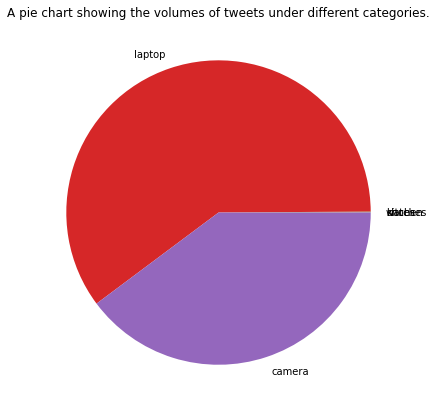

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize =(10, 7)) 
a = pivot_clusters.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show() 

**Calculating the required number of clusters using elbow method (average within clusters sum of squares**

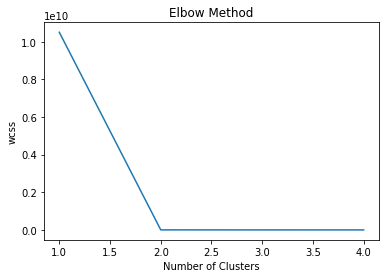

In [ ]:
X = pivot_clusters[['shoes','kitchen', 'watches', 'laptop', 'camera']].values
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=100, max_iter=3000, random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,5), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

**Performing simple clustering taking number of clusters as 2**

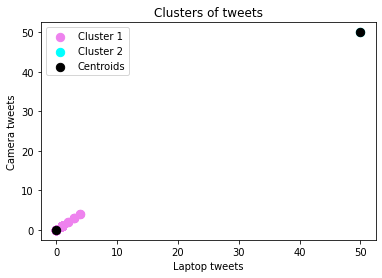

In [ ]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of tweets')
plt.xlabel('Laptop tweets')
plt.ylabel('Camera tweets')
plt.legend()
plt.show()

**Visualization to see top tweeting username per category**

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'Kitchen appliances tweets')

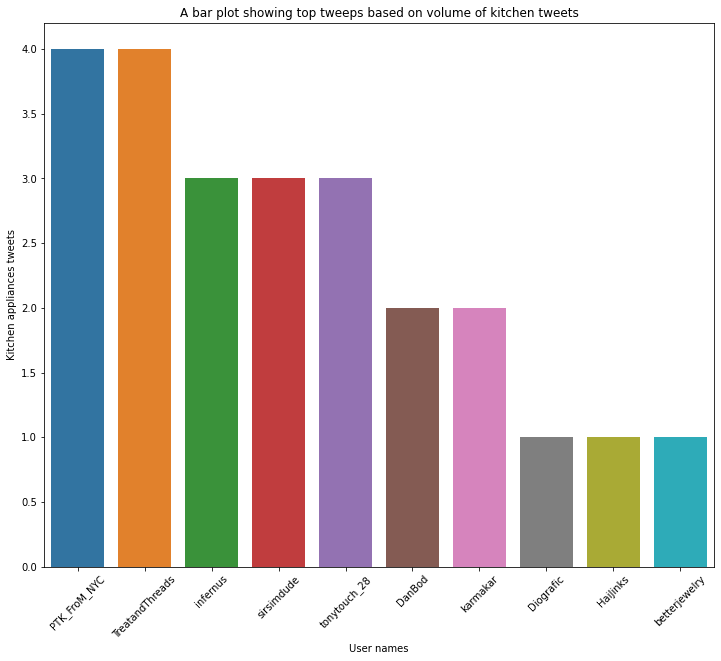

In [ ]:
d = pivot_clusters.sort_values(by = 'kitchen', ascending  = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.kitchen)
plt.title('A bar plot showing top tweeps based on volume of kitchen tweets')
plt.xticks(rotation=45)
plt.xlabel('User names')
plt.ylabel('Kitchen appliances tweets')